# Урок 9. Линейная регрессия Логистическая регрессия

## 1. 

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Формула для коэффициента наклона (b) и пересечения с осью Y (a) в уравнении линейной регрессии $ y = bx + a $ выглядит следующим образом:

$$ b = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{n(\sum{x^2}) - (\sum{x})^2} $$

$$ a = \frac{\sum{y} - b(\sum{x})}{n} $$

где:
- $ n $ — количество наблюдений,
- $ \sum{xy} $ — сумма произведений соответствующих значений X и Y,
- $ \sum{x} $, $ \sum{y} $ — суммы значений X и Y соответственно,
- $ \sum{x^2} $ — сумма квадратов значений X.

Для расчета без intercept, линия регрессии проходит через начало координат, то есть $ a = 0 $, и формула для коэффициента наклона упрощается до:

$$ b = \frac{\sum{xy}}{\sum{x^2}} $$


Рассчитаем коэффициенты с intercept:

Коэффициенты линейной регрессии с intercept: b0 = 444.1773573243596, b1 = 2.620538882402765


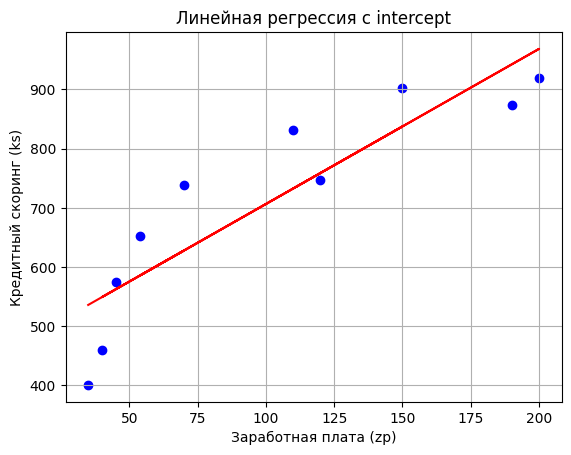

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# Расчет коэффициентов линейной регрессии с intercept
b1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp)**2)
b0 = np.mean(ks) - b1 * np.mean(zp)

print(f"Коэффициенты линейной регрессии с intercept: b0 = {b0}, b1 = {b1}")

# Построение графика
plt.scatter(zp, ks, color='blue')
plt.plot(zp, b0 + b1 * zp, color='red')
plt.title('Линейная регрессия с intercept')
plt.xlabel('Заработная плата (zp)')
plt.ylabel('Кредитный скоринг (ks)')
plt.grid(True)
plt.show()


Теперь рассчитаем коэффициенты без intercept:

Коэффициент линейной регрессии без intercept: b1 = 5.889820420132689


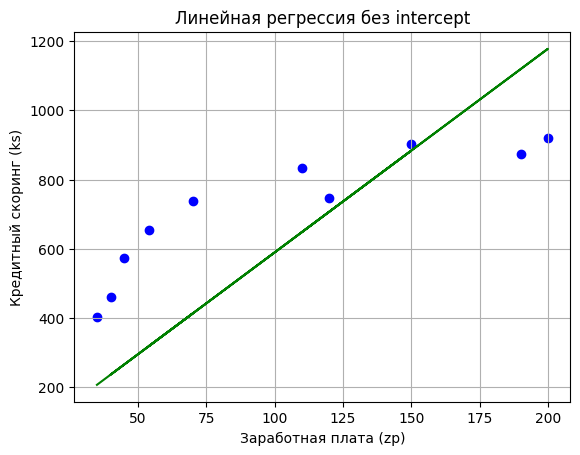

In [3]:
# Расчет коэффициентов линейной регрессии без intercept
b1_no_intercept = np.sum(zp * ks) / np.sum(zp**2)

print(f"Коэффициент линейной регрессии без intercept: b1 = {b1_no_intercept}")

# Построение графика
plt.scatter(zp, ks, color='blue')
plt.plot(zp, b1_no_intercept * zp, color='green')
plt.title('Линейная регрессия без intercept')
plt.xlabel('Заработная плата (zp)')
plt.ylabel('Кредитный скоринг (ks)')
plt.grid(True)
plt.show()


## 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [16]:
# Начальное приближение коэффициента b1
b1 = 0.1
alpha = 1e-6  # Скорость обучения

for i in range(1000):
    b1 -= alpha * (2 / n) * np.sum((b1 * zp - ks) * zp)

print(f"Коэффициент b1 после градиентного спуска: {b1}")

Коэффициент b1 после градиентного спуска: 5.889820420128437


## 3.

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [17]:
# Начальные приближения коэффициентов
b0 = 0.1
b1 = 0.1
alpha = 1e-6  # Скорость обучения

for i in range(1000):
    b0 -= alpha * (2 / n) * np.sum(b0 + b1 * zp - ks)
    b1 -= alpha * (2 / n) * np.sum((b0 + b1 * zp - ks) * zp)

print(f"Коэффициенты после градиентного спуска: b0 = {b0}, b1 = {b1}")


Коэффициенты после градиентного спуска: b0 = 0.3678115378258066, b1 = 5.887171701775072
